<a href="https://colab.research.google.com/github/yutongye616/python-colab/blob/main/distance_computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting distance matrix computation
Matrix dimensions (N x D):  10 10
Matrix dimensions (N x D):  20 10
Matrix dimensions (N x D):  30 10
Matrix dimensions (N x D):  40 10
Matrix dimensions (N x D):  50 10
Matrix dimensions (N x D):  60 10
Matrix dimensions (N x D):  70 10
Matrix dimensions (N x D):  80 10
Matrix dimensions (N x D):  90 10
Matrix dimensions (N x D):  100 10
Matrix dimensions (N x D):  110 10
Matrix dimensions (N x D):  120 10
Matrix dimensions (N x D):  130 10
Matrix dimensions (N x D):  140 10


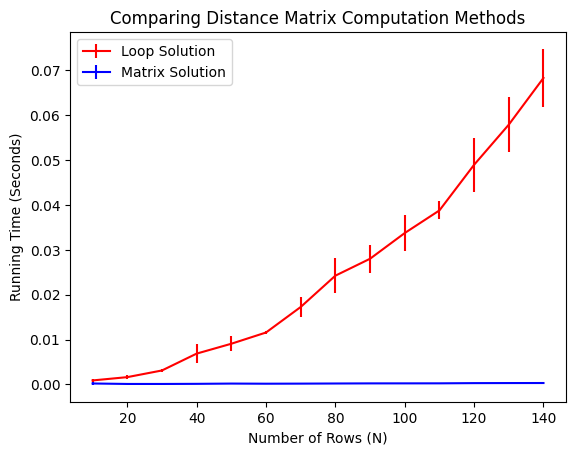

Result written to CompareDistanceFig.pdf


In [2]:
import numpy as np
import time

def compute_distance_naive(X):
    """
    Compute distance matrix using nested loops
    """
    N, D = X.shape
    M = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            diff = X[i] - X[j]
            M[i, j] = np.sqrt(np.dot(diff, diff))
    return M

def compute_distance_smart(X):
    """
    Compute distance matrix using vectorization
    """
    # using ||x_i - x_j|| = sqrt(||x_i||^2 - 2x_i^T x_j + ||x_j||^2)
    # ||x_i||^2 for all i
    squared_norms = np.sum(X**2, axis=1)
    # x_i^T x_j for all i,j
    dot_products = X @ X.T
    M_squared = squared_norms.reshape(-1, 1) - 2 * dot_products + squared_norms
    M_squared = np.maximum(M_squared, 0)
    return np.sqrt(M_squared)

print('Starting distance matrix computation')
# random number generator
np.random.seed(100)
# Creates parameter values
params = range(10, 141, 10)
# Counts parameter values
nparams = len(params)

 # 10 trials = 10 rows, each parameter is a column
perf_loop = np.zeros([10, nparams])
perf_cool = np.zeros([10, nparams])

counter = 0

 # N is the parameter for x-axis
for N in params:
    # using 10 features
    D = 10

    print("Matrix dimensions (N x D): ", N, D)

    for i in range(10):
        # random matrix
        X = np.random.rand(N, D)

        st = time.time()
        dist_loop = compute_distance_naive(X)
        et = time.time()
        perf_loop[i, counter] = et - st

        st = time.time()
        dist_cool = compute_distance_smart(X)
        et = time.time()
        perf_cool[i, counter] = et - st

        assert np.allclose(dist_loop, dist_cool, atol=1e-06)

    counter = counter + 1

mean_loop = np.mean(perf_loop, axis=0)
mean_cool = np.mean(perf_cool, axis=0)
std_loop = np.std(perf_loop, axis=0)
std_cool = np.std(perf_cool, axis=0)

import matplotlib.pyplot as plt
plt.errorbar(params, mean_loop[0:nparams], yerr=std_loop[0:nparams], color='red', label='Loop Solution')
plt.errorbar(params, mean_cool[0:nparams], yerr=std_cool[0:nparams], color='blue', label='Matrix Solution')
plt.xlabel('Number of Rows (N)')
plt.ylabel('Running Time (Seconds)')
plt.title('Comparing Distance Matrix Computation Methods')
plt.legend()
plt.savefig('CompareDistanceFig.pdf')
plt.show()

print("Result written to CompareDistanceFig.pdf")